In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
sns.set()

In [2]:
data = pd.read_csv('OnlineRetail.csv', sep=',', encoding="ISO-8859-1", header=0)

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Cleaning

In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We have a lot of missing id's so i will drop all null values.

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(406829, 8)

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


I'll perform cluster analysis on the basis of these:
1. Total transactions per customers.
2. Number of items bought by customer.
3. Days since last purchase.
4. Number of transactions.

## Data Creation

In [9]:
data_cleaned = pd.DataFrame(data.groupby('CustomerID')['Quantity'].sum())

In [10]:
data_cleaned['Country'] = data.groupby('CustomerID')['Country'].agg(lambda x:x.value_counts().index[0])

In [11]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
max_date = max(data['InvoiceDate'])
data['Duration'] = max_date - data['InvoiceDate']
data_cleaned['Last purchase (days)'] = data.groupby('CustomerID')['Duration'].min().dt.days

In [12]:
data['Total Amount'] = data['Quantity'] * data['UnitPrice']
data_cleaned['Transactions Amount'] = data.groupby('CustomerID')['Total Amount'].sum()

In [13]:
data_cleaned['Number of Transactions'] = data.groupby('CustomerID')['Total Amount'].count()

In [14]:
data_cleaned

,Quantity,Country,Last purchase (days),Transactions Amount,Number of Transactions
CustomerID,,,,,
12346.0,0,United Kingdom,326,0.00,2
12347.0,2458,Iceland,40,4310.00,182
12348.0,2341,Finland,76,1797.24,31
12349.0,631,Italy,19,1757.55,73
12350.0,197,Norway,311,334.40,17
...,...,...,...,...,...
18280.0,45,United Kingdom,160,180.60,10
18281.0,54,United Kingdom,4,80.82,7
18282.0,98,United Kingdom,93,176.60,13


We have number of transactions with 0 amount and quantity. Let's check this data

In [15]:
data_cleaned.loc[data_cleaned['Quantity'] == 0]

,Quantity,Country,Last purchase (days),Transactions Amount,Number of Transactions
CustomerID,,,,,
12346.0,0,United Kingdom,326,0.000000e+00,2
12454.0,0,Spain,54,-5.684342e-14,30
12558.0,0,USA,120,2.664535e-14,22
12607.0,0,USA,0,3.339551e-13,202
12908.0,0,United Kingdom,0,2.460000e+02,4
13364.0,0,United Kingdom,71,2.131628e-14,20
13762.0,0,United Kingdom,205,4.263256e-14,14
14557.0,0,United Kingdom,86,0.000000e+00,32
14792.0,0,United Kingdom,153,0.000000e+00,4


We have many customers with 0 quantity but with many number of transactions. These are outliers and redundant data so i'll consider droping them.

In [16]:
data_cleaned.drop(data_cleaned.loc[data_cleaned['Quantity'] == 0].index, inplace=True, axis=0)

In [17]:
data_cleaned.reset_index(inplace=True)

In [18]:
data_cleaned.head()

,CustomerID,Quantity,Country,Last purchase (days),Transactions Amount,Number of Transactions
0,12347.0,2458,Iceland,40,4310.00,182
1,12348.0,2341,Finland,76,1797.24,31
2,12349.0,631,Italy,19,1757.55,73
3,12350.0,197,Norway,311,334.40,17
4,12352.0,470,Norway,73,1545.41,95


## Cleaning orginal data

In [19]:
data.drop('Duration', axis=1, inplace=True)
data.drop(data.loc[data['Quantity'] == 0].index, inplace=True, axis=0)
data_cleaned.reset_index(inplace=True, drop=True)

## Exploratory Data Analysis

## 1. Number of items sold to countries.

In [20]:
sold_items = pd.DataFrame(data_cleaned.groupby('Country')['Quantity'].sum()).reset_index()

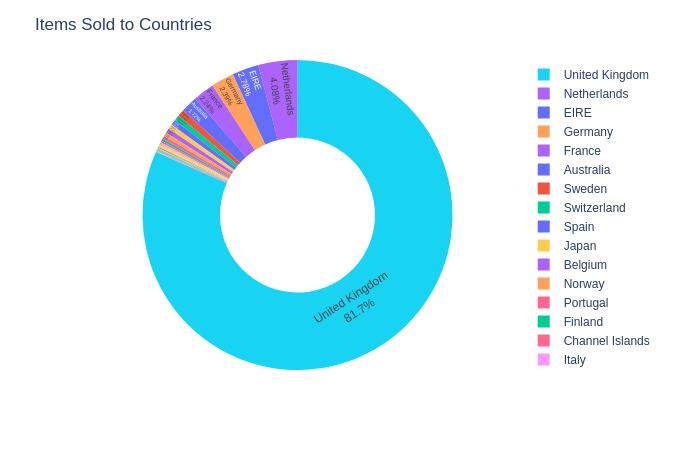

In [21]:
fig = px.pie(sold_items, names='Country', values='Quantity', color='Quantity', hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Items Sold to Countries')
fig.show('png')

Store sold items in very big quantity to US customers as compared to other countries.

## 2. Store revenue from each country

In [22]:
revnue = pd.DataFrame(data_cleaned.groupby('Country')['Transactions Amount'].sum()).reset_index()

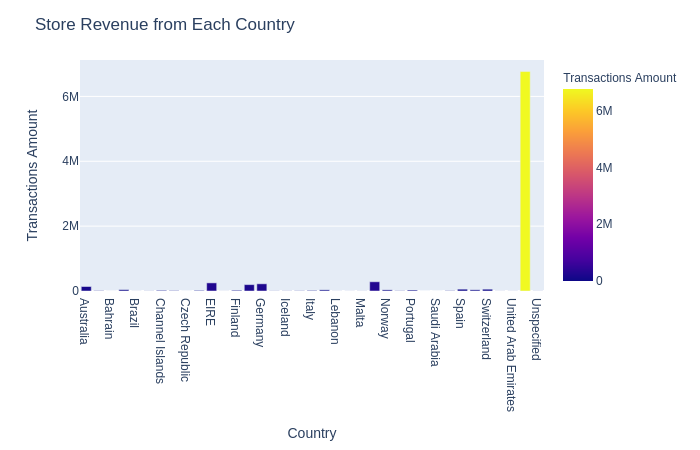

In [23]:
fig = px.bar(revnue, x='Country', y='Transactions Amount', color='Transactions Amount')
fig.update_layout(title='Store Revenue from Each Country')
fig.show('png')

Revenue showing same Behavior as sold items.<br>
Store make 6.76M revenue from only US.<br>
**From both above analysis we can see that store is highly popular in US as compared to other countries.**

## 3. Number of customers from country

In [24]:
customers = pd.DataFrame(data_cleaned['Country'].value_counts()).reset_index().rename(
    columns={'index':'Countries', 'Country': 'No of Customers'})

In [25]:
locator = Nominatim(user_agent="myGeocoder")

finding countries latitude and longitude by using geolocator.

In [26]:
geolocator = Nominatim(user_agent="mygeocoder")
def find_lat(country):
    location = geolocator.geocode(country)
    return location.latitude
def find_log(country):
    location = geolocator.geocode(country)
    return location.longitude

In [27]:
customers['Latitude'] = customers['Countries'].apply(lambda x: find_lat(x))
customers['Logitude'] = customers['Countries'].apply(lambda x: find_log(x))

In [28]:
customers.head()

,Countries,No of Customers,Latitude,Logitude
0,United Kingdom,3940,54.702354,-3.276575
1,Germany,95,51.083420,10.423447
2,France,87,46.603354,1.888334
3,Spain,29,39.326234,-4.838065
4,Belgium,24,50.640281,4.666715


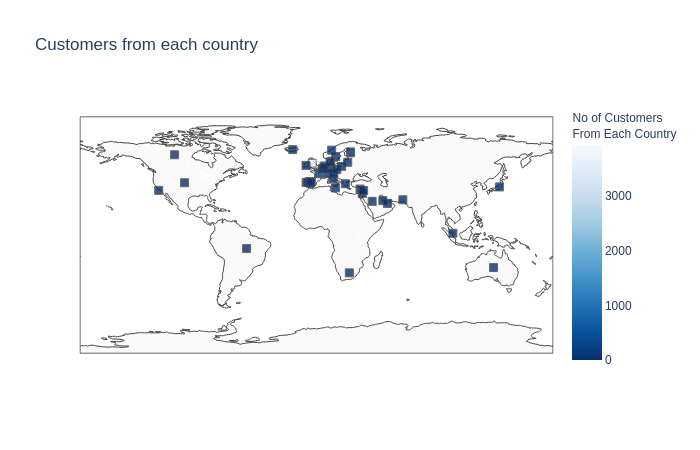

In [29]:
fig = go.Figure(data=go.Scattergeo(
        lon = customers['Logitude'],
        lat = customers['Latitude'],
        text = customers['Countries'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = customers['No of Customers'],
            cmax = customers['No of Customers'].max(),
            colorbar_title="No of Customers<br>From Each Country"
        )))

fig.update_layout(
        title = 'Customers from each country',
        geo = dict(
        #    scope='usa',
            projection_type='equirectangular',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show('png')

## 4. Churn and non churn customer last purchases.

In [38]:
oldest = data_cleaned.nlargest(5, ['Last purchase (days)', 'Transactions Amount'])
newest = data_cleaned[data_cleaned['Last purchase (days)'] == 0]
newest = newest.nlargest(5, ['Last purchase (days)', 'Transactions Amount'])
newest['Customer Type'] = 'Non Churn'
oldest['Customer Type'] = 'Churn'

In [45]:
cust = pd.concat([newest, oldest])
cust.rename(columns={'Last purchase (days)': 'Last Purchase', 'Transactions Amount': 'Amount', 
                     'Number of Transactions':'Transactions'}, inplace=True)
cust['Last Purchase'] = cust['Last Purchase'].apply(lambda x: {0 : 'Today', 697: '1 year 11 months'}[x])
cust['Amount'] = cust['Amount'].round()
cust.reset_index(drop=True, inplace=True)

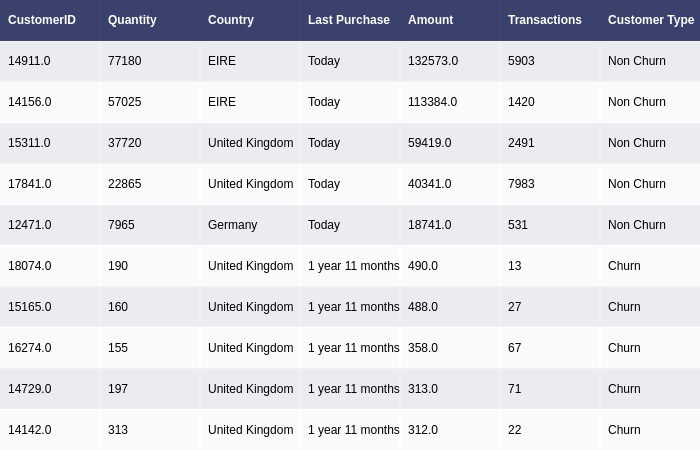

In [47]:
fig = ff.create_table(cust)
fig.show('png')

The top 5 oldest transaction from churn customers are 490, 488, 358, 313 and 312 dollars. <br> 
These churn customers last bought was 1 year and 11 months ago. After that they didn't came to buy any kind of stuff. These all customers belong to UK.<br> <br>
Non Churn Customers "we can say them royel customers" just bought stuff today from store today.<br> 
Out of Top 5 transactions Top 2 highest transactions till today from EIRE, next 2 by UK and last one from Germany.<br>
<br>
Let's visualize data in another style

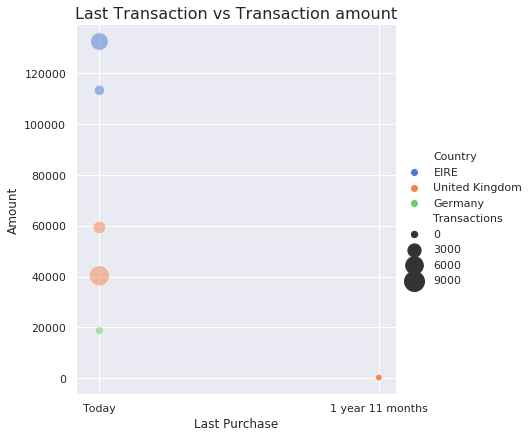

In [50]:
sns.relplot(x="Last Purchase", y="Amount", hue="Country", size="Transactions",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=cust)
plt.title('Last Transaction vs Transaction amount', fontsize=16)
plt.show()

## 5. Seasonal Analysis

### Monthly Sales

In [51]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']


mont_sa = data[['InvoiceDate', 'Quantity']]
mont_sa['InvoiceDate'] = data['InvoiceDate'].dt.month_name()
mont_sa = mont_sa.groupby('InvoiceDate')['Quantity'].sum().reindex(months) 
mont_sa = pd.DataFrame(mont_sa).reset_index()

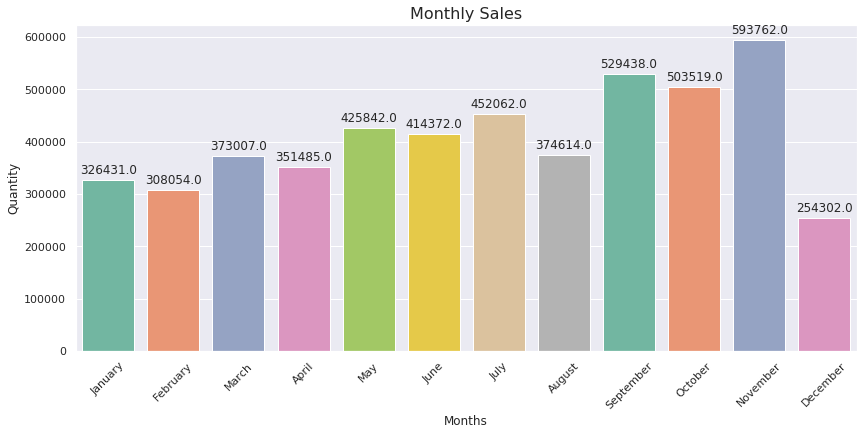

In [52]:
plt.figure(figsize=[14, 6])
fig = sns.barplot(data=mont_sa, x='InvoiceDate', y='Quantity', palette='Set2')

# adding quantity annot 
for p in fig.patches:
    fig.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                 va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Months')
plt.xticks(rotation=45)
plt.title('Monthly Sales', fontsize=16)
plt.show()

November have highest sales followed by sep and july. If we pay some attention we can see odd months sales increases but even months show some ups and down. December have lowest sales in spite of christmas month.

### Weekly Sales

In [53]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week_sa = data[['InvoiceDate', 'Quantity']]
week_sa['InvoiceDate'] = data['InvoiceDate'].dt.day_name()
week_sa = week_sa.groupby('InvoiceDate')['Quantity'].sum().reindex(cats) 
week_sa = pd.DataFrame(week_sa).reset_index()

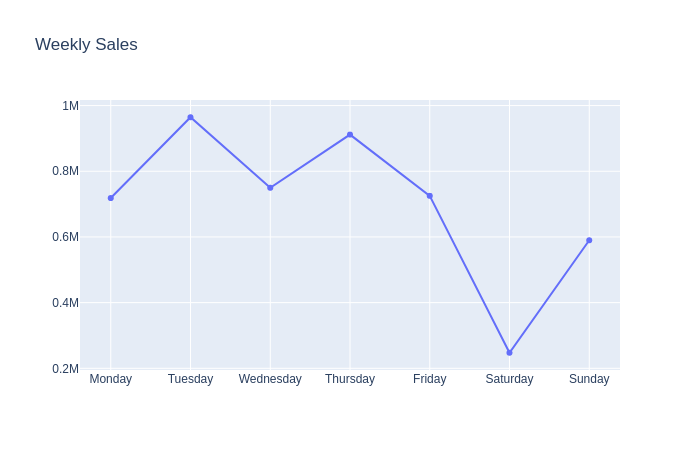

In [54]:
fig = go.Figure(data=go.Scatter(x=week_sa['InvoiceDate'], y=week_sa['Quantity']))
fig.update_layout(title='Weekly Sales')
fig.show('png')

Tuesday is the most busy day of store and saturday is free day.

### Quarterly Sales

In [55]:
quat_sa = data[['InvoiceDate', 'Quantity']]
quat_sa['InvoiceDate'] = data['InvoiceDate'].dt.quarter
quat_sa = quat_sa.groupby('InvoiceDate')['Quantity'].sum()
quat_sa = pd.DataFrame(quat_sa).reset_index()
quat_sa.rename(columns={'InvoiceDate':'Quarters'}, inplace=True)
quat_sa['Quarters'] = quat_sa['Quarters'].replace({1: 'Quarter 1', 2: 'Quarter 2', 3: 'Quarter 3', 4: 'Quarter 4'})

In [56]:
quat_sa

,Quarters,Quantity
0,Quarter 1,1007492
1,Quarter 2,1191699
2,Quarter 3,1356114
3,Quarter 4,1351583


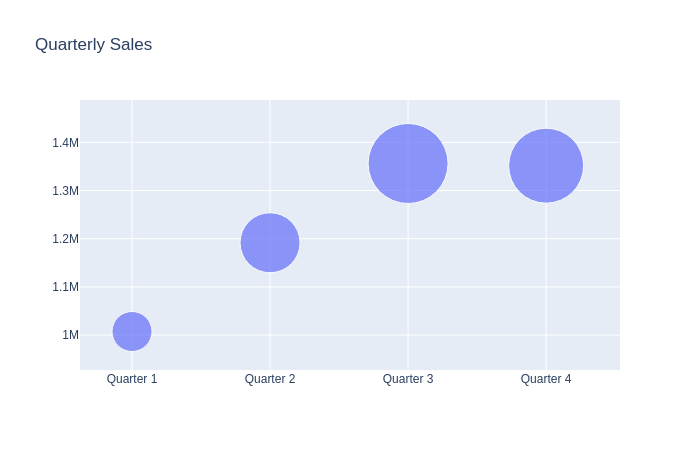

In [57]:
fig = go.Figure(data=[go.Scatter(
    x=quat_sa['Quarters'], y=quat_sa['Quantity'],
    mode='markers',
    marker_size=[40, 60, 80, 75])
])
fig.update_layout(title='Quarterly Sales')
fig.show('png')

Sales increased from q1 to q3 then q4 sales decreased slightly. 

### Yearly Sales

In [58]:
year_sa = data[['InvoiceDate', 'Quantity']]
year_sa['InvoiceDate'] = year_sa['InvoiceDate'].dt.year
year_sa = year_sa.groupby('InvoiceDate')['Quantity'].sum()
year_sa = pd.DataFrame(year_sa).reset_index()
year_sa['Total'] = sum(year_sa['Quantity'])

In [59]:
year_sa.rename(columns={'InvoiceDate': 'Years'}, inplace=True)

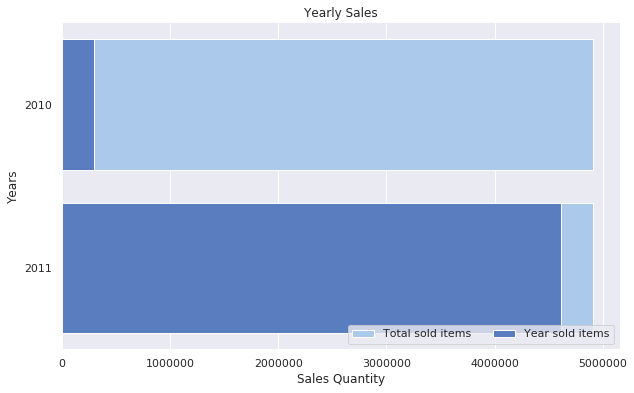

In [60]:
f, ax = plt.subplots(figsize=[10, 6])

sns.set_color_codes("pastel")
sns.barplot(x='Total', y='Years', data=year_sa, label='Total sold items', color='b', orient='h')

sns.set_color_codes('muted')
sns.barplot(x='Quantity', y='Years', data=year_sa, label='Year sold items', color='b', orient='h')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Sales Quantity")
ax.set(title='Yearly Sales')

sns.despine(left=True, bottom=True)

Store sold very low quantity of items in 2010 as compared to 2011.

# Store Seasonal Revenue

### Weekly

In [61]:
weekly_rev = data[['InvoiceDate', 'UnitPrice']]
weekly_rev['InvoiceDate'] = weekly_rev['InvoiceDate'].dt.day_name()
weekly_rev = weekly_rev.groupby('InvoiceDate')['UnitPrice'].sum().reindex(cats).reset_index()
weekly_rev.columns = ['Days', 'Revenue']

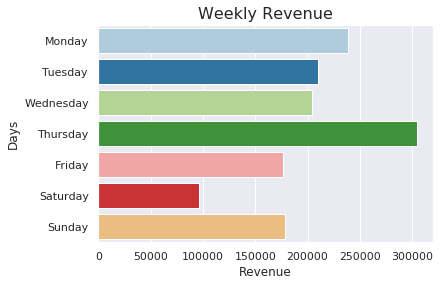

In [62]:
sns.barplot(data=weekly_rev, x='Revenue', y='Days', orient='h', palette='Paired')
plt.title('Weekly Revenue', fontsize=16)
plt.show()

### Monthly

In [63]:
monthly_rev = data[['InvoiceDate', 'UnitPrice']]
monthly_rev['InvoiceDate'] = monthly_rev['InvoiceDate'].dt.month_name()
monthly_rev = monthly_rev.groupby('InvoiceDate')['UnitPrice'].sum().reindex(months).reset_index()
monthly_rev.columns = ['Months', 'Revenue']
monthly_rev['Perc'] = round(monthly_rev['Revenue']/sum(monthly_rev['Revenue']) *100,2)

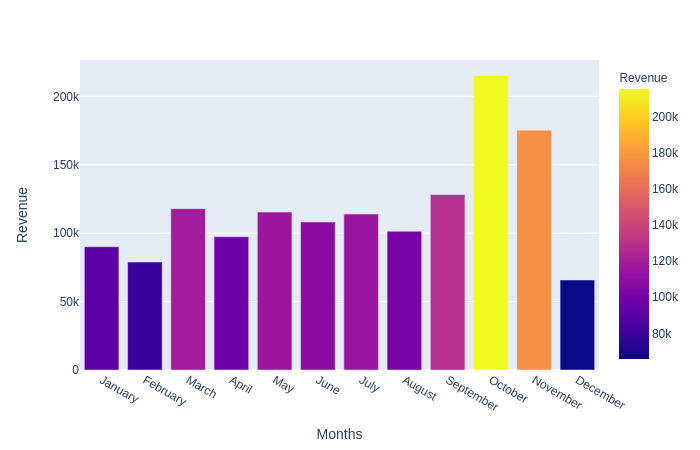

In [64]:
fig = px.bar(monthly_rev, x='Months', y='Revenue',
             hover_data=['Months', 'Revenue', 'Perc'], color='Revenue',
              height=400)
fig.show('png')

If we see above monthly sales November have highest sales and oct in third but store revenue showing something different. It's mean that the november sales were high but sold items had low prices. <br>
In other case Oct have less sales but high revenue it's mean Oct sales include majority of expensive items.

### Quarter 

In [65]:
quat_re = data[['InvoiceDate', 'UnitPrice']]
quat_re['InvoiceDate'] = data['InvoiceDate'].dt.quarter
quat_re = quat_re.groupby('InvoiceDate')['UnitPrice'].sum()
quat_re = pd.DataFrame(quat_re).reset_index()
quat_re.rename(columns={'InvoiceDate':'Quarters'}, inplace=True)
quat_re['Quarters'] = quat_re['Quarters'].replace({1: 'Quarter 1', 2: 'Quarter 2', 3: 'Quarter 3', 4: 'Quarter 4'})

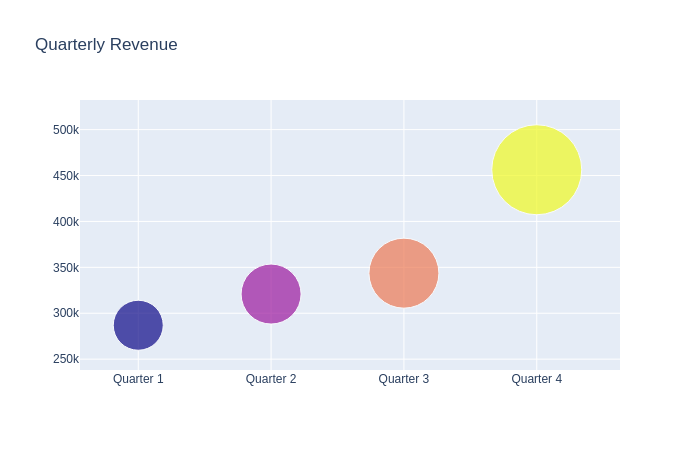

In [66]:
fig = go.Figure(data=[go.Scatter(
    x=quat_re['Quarters'], y=quat_re['UnitPrice'],
    mode='markers',
    marker=dict(size=[50, 60, 70, 90],
                color=[0, 1, 2, 3]))
])
fig.update_layout(title='Quarterly Revenue')
fig.show('png')

Quarter sales and Quarter Revenue showing different behaviour. First 3 quarters revenue increasing gradualy but quarter 4 revenue increased quickly that's because of NOV, OCT. Both month have highest revenue and they both lie in last quarter.<br>

### Yearly

In [67]:
year_re = data[['InvoiceDate', 'UnitPrice']]
year_re['InvoiceDate'] = year_re['InvoiceDate'].dt.year
year_re = year_re.groupby('InvoiceDate')['UnitPrice'].sum()
year_re = pd.DataFrame(year_re).reset_index()
year_re['Total'] = sum(year_re['UnitPrice'])

In [68]:
year_re.rename(columns={'InvoiceDate': 'Years'}, inplace=True)

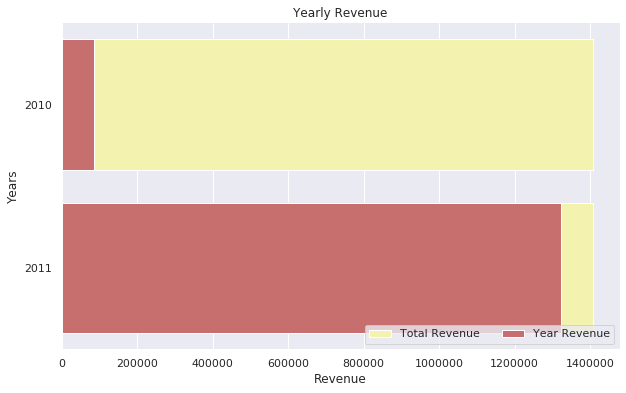

In [69]:
f, ax = plt.subplots(figsize=[10, 6])

sns.set_color_codes("pastel")
sns.barplot(x='Total', y='Years', data=year_re, label='Total Revenue', color='y', orient='h')

sns.set_color_codes('muted')
sns.barplot(x='UnitPrice', y='Years', data=year_re, label='Year Revenue', color='r', orient='h')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Revenue")
ax.set(title='Yearly Revenue')

sns.despine(left=True, bottom=True)

Yearly revenue and sales showing same behaviour.

## Save data

In [70]:
final_data = data_cleaned[['Quantity', 'Last purchase (days)', 'Transactions Amount', 'Number of Transactions']]
final_data.to_csv('final_data_for_clustering.csv', index=False)